In [2]:
# External libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading necessary data

In [3]:
# Load data
act = pd.read_csv('../data/act_all.csv')
sat = pd.read_csv('../data/sat_all.csv')

In [4]:
# Binary column to identify ACT or SAT
act['is_act'] = 1
sat['is_act'] = 0

# Combine data for ease of analysis
cols = ['state','participation','year','is_act']
combined = pd.concat([act.loc[:,cols], sat.loc[:,cols]])
combined.shape

(306, 4)

---
## Histograms

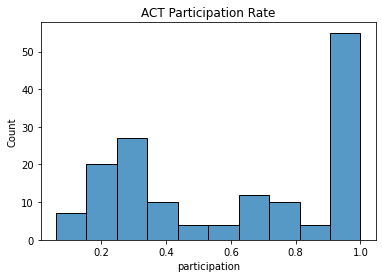

In [6]:
participation = act.loc[:,['participation']]

f = plt.figure()
plt.title('ACT Participation Rate')
sns.histplot(data = participation, x = 'participation', bins = 10);
f.savefig("../Plots/act-participation-date.png", bbox_inches='tight', dpi=600)

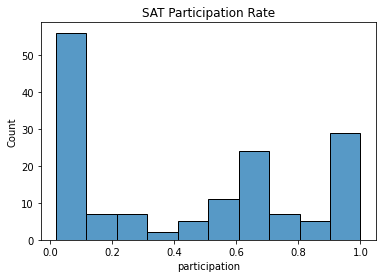

In [7]:
participation = sat.loc[:,['participation']]

f = plt.figure()
plt.title('SAT Participation Rate')
sns.histplot(data = participation, x = 'participation', bins = 10);
f.savefig("../Plots/sat-participation-date.png", bbox_inches='tight', dpi=600)

---
## Texas and California

In [23]:
texas = combined.loc[combined['state']=='Texas', :][['participation','year','is_act']].reset_index()
california = combined.loc[combined['state']=='California', :][['participation','year','is_act']].reset_index()

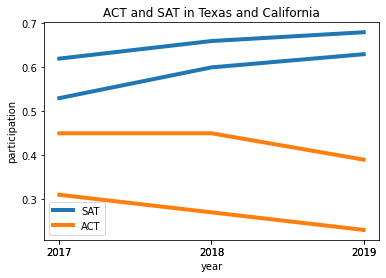

In [26]:
f = plt.figure()
plt.title('ACT and SAT in Texas and California')
sns.lineplot(x = california['year'], y = california['participation'], hue = california['is_act'], linewidth = 4)
sns.lineplot(x = texas['year'], y = texas['participation'], hue = texas['is_act'], linewidth = 4)
plt.legend(labels=['SAT','ACT'])
plt.xticks(california['year']);
f.savefig("../Plots/texas-california.png", bbox_inches='tight', dpi=600)

---
## Score vs Participation

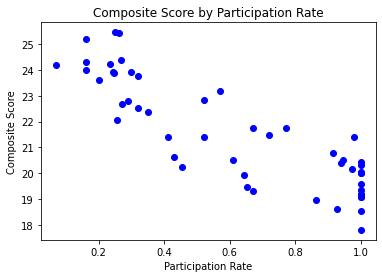

In [8]:
# Investigate relationship between composite and participation
composite = act.groupby('state').mean().round(3).sort_values('composite').loc[:, ['participation', 'composite']]
composite.head()

f = plt.figure()
plt.title('Composite Score by Participation Rate')
plt.xlabel('Participation Rate')
plt.ylabel('Composite Score')
plt.plot(composite['participation'], composite['composite'], 'bo');
f.savefig("../Plots/composite-participation.png", bbox_inches='tight', dpi=600)

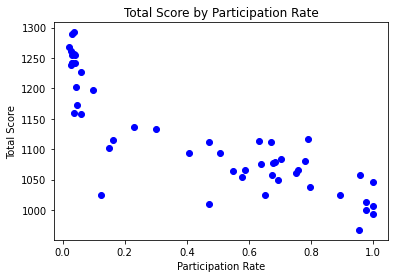

In [9]:
# Investigate relationship between total score and participation
total_score = sat.groupby('state').mean().round(3).sort_values('total').loc[:, ['participation', 'total']]
total_score.tail()

f = plt.figure()
plt.title('Total Score by Participation Rate')
plt.xlabel('Participation Rate')
plt.ylabel('Total Score')
plt.plot(total_score['participation'], total_score['total'], 'bo');
f.savefig("../Plots/total-participation.png", bbox_inches='tight', dpi=600)

---
## Heatmap

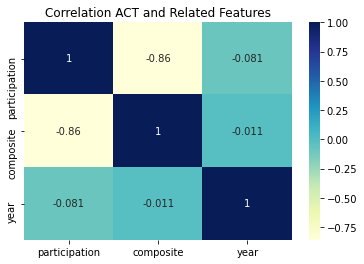

In [10]:
cols = ['participation','composite','year']

f = plt.figure()
plt.title('Correlation ACT and Related Features')
sns.heatmap(data = act[cols].corr(), cmap = 'YlGnBu', annot=True);
f.savefig("../Plots/heatmap-act.png", bbox_inches='tight', dpi=600)

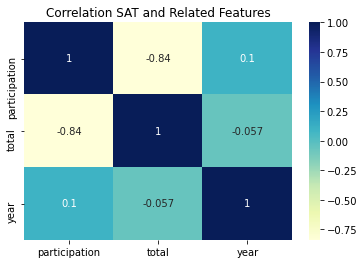

In [11]:
cols = ['participation','total','year']

# Plot
f = plt.figure()
plt.title('Correlation SAT and Related Features')
sns.heatmap(data = sat[cols].corr(), cmap = 'YlGnBu', annot=True);
f.savefig("../Plots/heatmap-sat.png", bbox_inches='tight', dpi=600)

---
## Boxplots

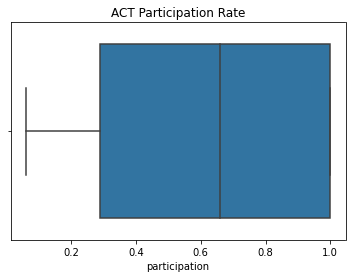

In [13]:
f = plt.figure()
plt.title('ACT Participation Rate')
sns.boxplot(data = act, x = 'participation');
f.savefig("../Plots/boxplot-act.png", bbox_inches='tight', dpi=600)

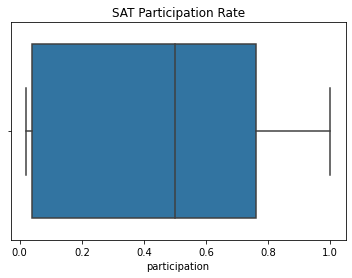

In [14]:
f = plt.figure()
plt.title('SAT Participation Rate')
sns.boxplot(data = sat, x = 'participation');
f.savefig("../Plots/boxplot-sat.png", bbox_inches='tight', dpi=600)